In [3]:
# Install required packages
!pip install opencv-python-headless zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [11]:
# Import necessary libraries
from google.colab import drive  # Library for connecting to Google Drive
import cv2
import zipfile
import numpy as np
from PIL import Image
import io
from tabulate import tabulate
import warnings
import shutil
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt



# Define the path to the zip file and the extraction folder
zip_file_path = '/content/drive/MyDrive/002__DISSERTATION/DATASET/images/sample.zip'
extract_folder = 'extracted_content/'


# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Mounted at /content/drive


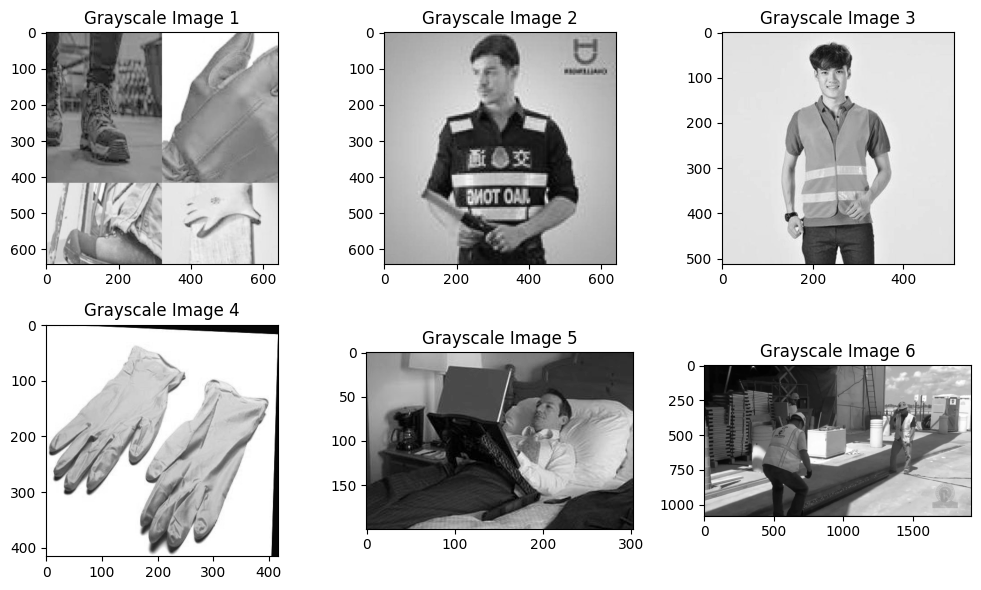

In [26]:
import matplotlib.pyplot as plt
import random

gray_folder = 'grayscale_images/'

if os.path.exists(gray_folder):
    shutil.rmtree(gray_folder)
os.makedirs(gray_folder)

# Get a list of grayscale image paths
gray_image_paths = []

# Traverse the zip archive and collect grayscale image paths
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
            with zip_ref.open(file_info.filename) as file:
                file_data = np.asarray(bytearray(file.read()), dtype=np.uint8)
                img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gray_img_path = os.path.join(gray_folder, file_info.filename.split('/')[-1])
                cv2.imwrite(gray_img_path, gray_img)
                gray_image_paths.append(gray_img_path)

# Shuffle the list of grayscale image paths
random.shuffle(gray_image_paths)

# Create a 3x3 grid for displaying images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Initialize counter for displaying images
image_counter = 0

# Traverse the list of grayscale image paths and display 9 images
for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        if image_counter < len(gray_image_paths):
            gray_img = cv2.imread(gray_image_paths[image_counter], cv2.IMREAD_GRAYSCALE)
            ax.imshow(gray_img, cmap='gray')
            ax.set_title(f"Grayscale Image {image_counter + 1}")
            ax.axis('on')
            image_counter += 1
        else:
            ax.axis('off')

# Show the figure with 9 grayscale images in a 3x3 grid
plt.tight_layout()
plt.show()



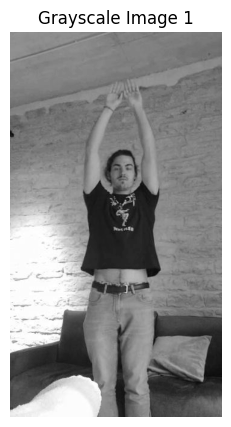

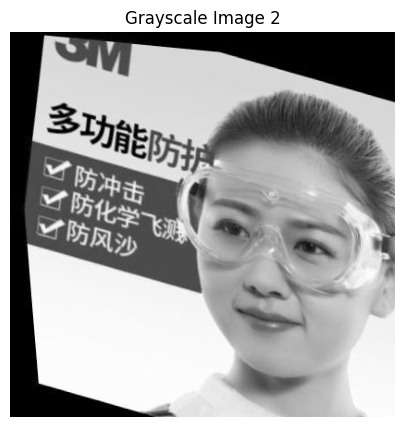

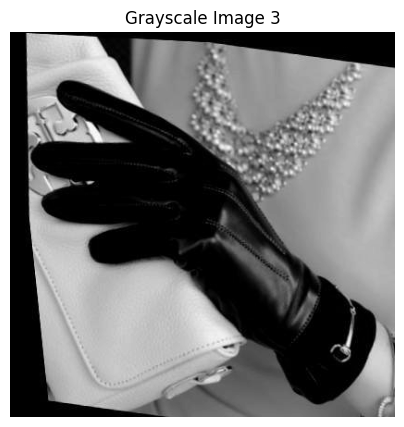

In [10]:
# Create the zip file
gray_folder = 'grayscale_images/'

if os.path.exists(gray_folder):
    shutil.rmtree(gray_folder)
os.makedirs(gray_folder)

# Initialize counter for displaying images
image_counter = 0

# Traverse the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        # Filter image files
        if file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
            with zip_ref.open(file_info.filename) as file:
                # Transform the bytes into a NumPy array
                file_data = np.asarray(bytearray(file.read()), dtype=np.uint8)

                # Decode the image
                img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)

                # Transform to grayscale
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Save the grayscale image
                gray_img_path = os.path.join(gray_folder, file_info.filename.split('/')[-1])
                cv2.imwrite(gray_img_path, gray_img)

                # Display the first 3 grayscale images
                if image_counter < 3:
                    plt.figure(figsize=(5, 5))
                    plt.imshow(gray_img, cmap='gray')
                    plt.title(f"Grayscale Image {image_counter + 1}")
                    plt.axis('off')
                    plt.show()

                    image_counter += 1